## X-Ray PNEUMONIA CLASSIFICATION

### This a balanced approach to classify the image dataset

##### Importing libraries

In [1]:
import os 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Dropout , Flatten , BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

### Listing Directory Contents
##### Seting the directory path and listing all files and subdirectories in the specified directory.

In [4]:
dirPath = "Pneumonia Dataset/newTrain/"
dataset_directory = os.listdir(dirPath)
print(dataset_directory)

['NORMAL', 'PNEUMONIA']


### Setting Image Size and Training Batch Size
##### Seting the image size to 100 pixels and the training batch size to 32, preparing the parameters for the image processing.

In [5]:
img_size = 100
train_batch = 32 

### Creating Image Dataset from Directory
##### Creating an image dataset given the path "dirPath" , with a fixed seed for reproducibility, using a batch size of 32 and image size of 100x100 pixels.

In [6]:
dir_Dataset = tf.keras.utils.image_dataset_from_directory(dirPath, seed = 123,
batch_size=train_batch  , image_size = (img_size,img_size))  

Found 3150 files belonging to 2 classes.


### Length of "dir_Dataset"

In [7]:
print(f" Length of dir_Dataset is :- {len(dir_Dataset)}")

 Length of dir_Dataset is :- 99


##### The length returned value "99". Here how it is calculated --> the total number of files have been divided by batch size of 32 --> (3150 / 32) --> resulting in length of 99.

.

### Retrieving and Printing Class Names from Dataset

In [8]:
trainClassNames = dir_Dataset.class_names 
print(trainClassNames) 

['NORMAL', 'PNEUMONIA']


### Inspecting a Batch of Images and Labels from the Dataset
##### Here , using for loop iterating over a single batch from the image dataset "dir_Dataset" and printing the shapes of the image and label batches, as well as the labels themselves. It provides an overview of the structure and content of the dataset.


In [9]:
for image_batch, label_batch in dir_Dataset.take(1):  
    print(f'Image batch shape: {image_batch.shape}')
    print(f'Label batch shape: {label_batch.shape}')
    print(f'Labels: {label_batch.numpy()}') 

Image batch shape: (32, 100, 100, 3)
Label batch shape: (32,)
Labels: [0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1]


Image batch shape: (32, 100, 100, 3) - This indicates a batch of 32 images, each of size 100x100 pixels with 3 color channels (RGB).

Label batch shape: (32,) - This signifies 32 corresponding labels.

Labels: [0 1 0 1 ... 1] - An array of 32 labels, indicating the class for each image in the batch.

.

### Visualizing Sample Images from the Dataset
##### Creating a 10x10 figure and displaying the first two images from the dataset "dir_Dataset" with their corresponding class labels as titles. It uses plt.imshow to render the images and plt.subplot to arrange them in a grid layout.

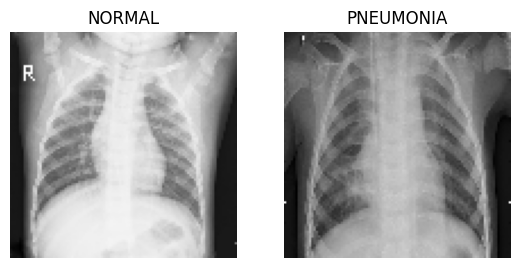

In [ ]:
plt.figure(figsize=(10,10))

for images, labels in dir_Dataset.take(1):
    for i in range(2):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(trainClassNames[labels[i]])
        plt.axis("off")


### Splitting dataset
##### Using the function "get_dataset_partitions" splitting the dataset into Training and Testing.

In [10]:
def get_dataset_partitions(dataset, train_split=0.8, test_split=0.2, shuffle=True, shuffle_size=1000):
    assert (train_split + test_split) == 1
    
    dataset_size = len(dataset)
    
    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * dataset_size)
    
    train_dataset = dataset.take(train_size)
    test_dataset = dataset.skip(train_size)
    
    return train_dataset, test_dataset

In [11]:
train_dataset , test_dataset = get_dataset_partitions(dir_Dataset) 

In [12]:
len(train_dataset)  

79

##### The length of the training dataset "train_dataset" is 79 which is the 80% of the "dir_Dataset". The length indicates the batches.

.

### Optimizing Data Pipeline for Training and Testing

Caching: Storing data in memory to speed up access.

Shuffling: Randomizing the data order with a buffer size of 1000 to ensure the model doesn't learn any unintended patterns.

Prefetching: Preloading data to improve training efficiency, using tf.data.AUTOTUNE to automatically tune the buffer size for optimal performance.

In [13]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

.

### Converting The "train_dataset" Training Dataset to Numpy Arrays

In [169]:
images_list, labels_list = [], []
for image_batch, label_batch in train_dataset:
    images_list.append(image_batch.numpy())
    labels_list.append(label_batch.numpy())

images_array = np.vstack(images_list)
labels_array = np.hstack(labels_list) 

### An Insight Into The "images_array" and "labels_array"

In [170]:
print("Printing images array :-")
print(images_array[0][0][0]) 

print("-----------------------------------------" , end="\n\n")

print("Printing labels array :-")
print(labels_array)  

Printing images array :-
[125.5616 125.5616 125.5616]
-----------------------------------------

Printing labels array :-
[0 0 0 ... 0 0 1]


In [171]:
print("An Insight Into Image Array \n")
print(f"Shape of images_array is :- {images_array.shape}")
print(f"Length of images_array is :- {len(images_array)}")
print(f"Dimension of images_array is :- {images_array.ndim}")
print(f"Type of images_array is :- {type(images_array)}") 

print("-----------------------------------------" , end="\n\n")

print("An Insight Into Image Label Array \n")
print(f"Shape of labels_array is :- {labels_array.shape}") 
print(f"Length of labels_array is :- {len(labels_array)}")
print(f"Dimension of labels_array is :- {labels_array.ndim}")
print(f"Type of labels_array is :- {type(labels_array)}") 


An Insight Into Image Array 

Shape of images_array is :- (2510, 100, 100, 3)
Length of images_array is :- 2510
Dimension of images_array is :- 4
Type of images_array is :- <class 'numpy.ndarray'>
-----------------------------------------

An Insight Into Image Label Array 

Shape of labels_array is :- (2510,)
Length of labels_array is :- 2510
Dimension of labels_array is :- 1
Type of labels_array is :- <class 'numpy.ndarray'>


### Scaling Image Pixel Values

Scaling the pixel values of the images to a range of 0 to 1 by dividing them by 255. This helps standardize the input data, ensuring that all images are on the same scale. Normalizing pixel values can improve numerical stability during calculations, reducing the risk of issues like vanishing or exploding gradients in deep learning models. 

In [172]:
images_array_scaled = images_array / 255.0

print("Printing images_array_scaled :-")
print(images_array_scaled[0][0][0]) 


Printing images_array_scaled :-
[0.49239844 0.49239844 0.49239844]


### Data Augmentation for Image Preprocessing


RandomFlip: Flips images horizontally.

RandomRotation: Rotates images by up to 10% (0.1).

RandomZoom: Zooms images by up to 10% (0.1).

Data augmentation helps improve model robustness and generalization by creating more varied training examples.


In [173]:
dataAugmentation = Sequential([
    layers.RandomFlip("horizontal",input_shape=(img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])


c:\Users\Sambhu\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Displaying Augmented Images

Applying data augmentation to images from the dataset and visualizing the first 9 augmented images in a 3x3 grid.

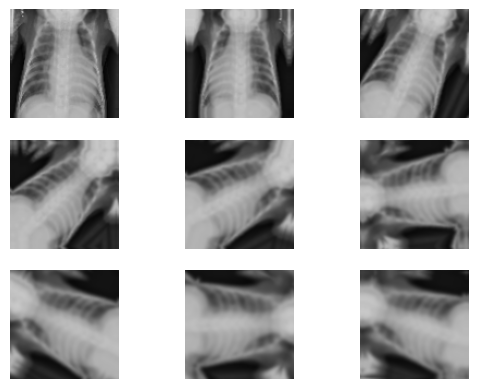

In [54]:
for images, labels in dir_Dataset.take(1):
    for i in range(9):
        images = dataAugmentation(images)
        plt.subplot(3,3,i+1)
        plt.imshow(images[0].numpy().astype("uint8"))
        plt.axis("off")


### CNN MODEL

In [174]:
cnnNewModel = Sequential([
    dataAugmentation,
    Conv2D(128,3,padding="same",activation="relu",input_shape=(img_size,img_size,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(128,3,padding="same",activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),

    Conv2D(128,3,padding="same",activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128,activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(2)
])  

c:\Users\Sambhu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compiling the CNN Model

Optimizer: "adam" for efficient gradient descent optimization.

Loss Function: SparseCategoricalCrossentropy(from_logits=True) to compute the loss for multi-class classification tasks. Instead of using "binary_crossentropy" for the given model I have continued with this loss function is due the fact that the CNN sequencial model has an open dense layer at the end and it is a logits layer which throws raw output as values. Logits Layers --> (The output consists of raw scores for each class, which are not bounded within a specific range like probabilities.) Also "SparseCategoricalCrossentropy" was better performing compared to "binary_crossentropy".

Metrics: ["accuracy"] to evaluate and display the accuracy of the model during training and evaluation.

In [175]:
cnnNewModel.compile(optimizer="adam"
              ,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"]) 

### Displaying the Model Summary

In [176]:
cnnNewModel.summary() 

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 100, 100, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 100, 100, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 50, 50, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 50, 50, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 25, 25, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,660,482 (10.15 MB)

 Trainable params: 2,659,458 (10.15 MB)

 Non-trainable params: 1,024 (4.00 KB)

Total params: 2,660,482 (10.15 MB) - The total number of parameters in the model.

Trainable params: 2,659,458 (10.15 MB) - Parameters that will be updated during training.

Non-trainable params: 1,024 (4.00 KB) - Parameters that remain constant during training.

.

### Callbacks

Callbacks functions/methods are executed at specific stages during model training to perform actions such as saving checkpoints, early stopping, adjusting learning rates, and logging progress, enhancing training control and efficiency.

In [177]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
model_Check = ModelCheckpoint('checkModel.keras',monitor='val_accuracy',save_best_only=True,mode='max',verbose=1)

### Training the CNN Model 


images_array_scaled, labels_array: The input data and there labels.

validation_split=0.3: Reserves 30% of the data for validation.

epochs=100: Sets the number of training iterations to 100.

callbacks: A list of callback functions (early_stopping, lr_scheduler, model_Check) to enhance training control.

In [187]:
history = cnnNewModel.fit(
    images_array_scaled,
    labels_array,
    validation_split=0.3,
    epochs=100,
    callbacks=[early_stopping, lr_scheduler,model_Check]
)

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 776ms/step - accuracy: 0.9482 - loss: 0.1364
Epoch 1: val_accuracy did not improve from 0.93227
55/55 ━━━━━━━━━━━━━━━━━━━━ 46s 831ms/step - accuracy: 0.9481 - loss: 0.1366 - val_accuracy: 0.9044 - val_loss: 0.4079 - learning_rate: 5.0000e-04
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 743ms/step - accuracy: 0.9511 - loss: 0.1278
Epoch 2: val_accuracy did not improve from 0.93227
55/55 ━━━━━━━━━━━━━━━━━━━━ 44s 798ms/step - accuracy: 0.9511 - loss: 0.1277 - val_accuracy: 0.9296 - val_loss: 0.2503 - learning_rate: 5.0000e-04
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 741ms/step - accuracy: 0.9458 - loss: 0.1438
Epoch 3: val_accuracy did not improve from 0.93227
55/55 ━━━━━━━━━━━━━━━━━━━━ 44s 794ms/step - accuracy: 0.9459 - loss: 0.1436 - val_accuracy: 0.8194 - val_loss: 0.4434 - learning_rate: 5.0000e-04
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 731ms/step - accuracy: 0.9533 - loss: 0.1328
Epoch 4: val_accuracy improved from 0.93227 to 0.94954, savin

The model scored a validation accuracy of "0.94954" <-- "94.95%"

.

### Leading the model

In [2]:
best_cnnModel = load_model('checkModel.keras')

### Converting The Testing Dataset Into Numpy Arrays

In [14]:
test_images_list, test_labels_list = [], []
for image_batch, label_batch in test_dataset:
    test_images_list.append(image_batch.numpy())
    test_labels_list.append(label_batch.numpy())

test_images_array = np.vstack(test_images_list)
test_labels_array = np.hstack(test_labels_list)

##### An Insight Into "test_images_array" and "test_labels_array"

In [15]:
print("Printing images array :-")
print(test_images_array[0][0][0]) 

print("-----------------------------------------" , end="\n\n")

print("Printing labels array :-")
print(test_labels_array[0:20]) 

Printing images array :-
[76.159996 76.159996 76.159996]
-----------------------------------------

Printing labels array :-
[1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0]


In [16]:
print("An Insight Into Test Image Array \n")
print(f"Shape of test_images_array is :- {test_images_array.shape}")
print(f"Length of test_images_array is :- {len(test_images_array)}")
print(f"Dimension of test_images_array is :- {test_images_array.ndim}")
print(f"Type of test_images_array is :- {type(test_images_array)}") 

print("-----------------------------------------" , end="\n\n")

print("An Insight Into Test Image Label Array \n")
print(f"Shape of test_labels_array is :- {test_labels_array.shape}") 
print(f"Length of test_labels_array is :- {len(test_labels_array)}")
print(f"Dimension of test_labels_array is :- {test_labels_array.ndim}")
print(f"Type of test_labels_array is :- {type(test_labels_array)}") 


An Insight Into Test Image Array 

Shape of test_images_array is :- (640, 100, 100, 3)
Length of test_images_array is :- 640
Dimension of test_images_array is :- 4
Type of test_images_array is :- <class 'numpy.ndarray'>
-----------------------------------------

An Insight Into Test Image Label Array 

Shape of test_labels_array is :- (640,)
Length of test_labels_array is :- 640
Dimension of test_labels_array is :- 1
Type of test_labels_array is :- <class 'numpy.ndarray'>


### Scaling / Normalizing Test Dataset

Scaling ensures that all features contribute equally to the model's decisions. If the test data remains unscaled, features with larger ranges could disproportionately influence the results, leading to biased or inaccurate predictions. . Without scaling the test data, the model might misinterpret the input, leading to unreliable results.

In [17]:
test_images_array_scaled = test_images_array / 255.0

print("Printing test_images_array_scaled :-")
print(test_images_array_scaled[0][0][0]) 

Printing test_images_array_scaled :-
[0.29866666 0.29866666 0.29866666]


### Evaluating Model Performance on Test Data

In [18]:
val_loss , val_accuracy = best_cnnModel.evaluate(test_images_array_scaled,test_labels_array)
print(f"val_accuracy :- {val_accuracy} and val_loss :- {val_loss}") 

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9570 - loss: 0.1238
val_accuracy :- 0.9515625238418579 and val_loss :- 0.12693408131599426


##### The model has scored a testing accuracy of 95%. Which is indeed great in comparison to earlier approaches.

.

### Making Predictions and Preparing Evaluation Metrics

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

predictions = best_cnnModel.predict(test_images_array_scaled)
y_pred = np.argmax(predictions, axis=1) 

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step


In [20]:
y_pred[0:20] 

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0],
      dtype=int64)

### Calculating Accuracy Scores Of The Model's Performance 

In [21]:
accuracy = accuracy_score(test_labels_array , y_pred)
precision = precision_score(test_labels_array , y_pred) 
recall = recall_score(test_labels_array , y_pred)
f1 = f1_score(test_labels_array , y_pred) 
confMatrix = confusion_matrix(test_labels_array , y_pred)

In [22]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n {confMatrix}")  

Accuracy: 0.9515625
Precision: 0.9534883720930233
Recall: 0.944078947368421
F1 Score: 0.9487603305785124
Confusion Matrix:
 [[322  14]
 [ 17 287]]


Accuracy: 0.9515625 - 95.16% of predictions are correct.

Precision: 0.9534883720930233 - 95.35% of positive predictions are accurate.

Recall: 0.944078947368421 - 94.41% of actual positives are correctly identified.

F1 Score: 0.9487603305785124 - Harmonic mean of precision and recall.

<br>

Calculations:

Accuracy: (TP + TN) / (TP + FP + FN TN ) = (287 + 322) / (322 + 14 + 17 + 287) = 0.9515625 

Precision: (TP) / (TP + FP) = (287) / (287 + 14) =  0.9534883720930233 

Recall: (TP) / (TP + FN) = (287) / (287 + 17) = 0.944078947368421 

F1 Score: 2 * (Precision * Recall)/ (Precision + Recall) =  2 * (0.9534883720930233 * 0.944078947368421) / (0.9534883720930233 + 0.944078947368421) = 9487603305785124


<br>


Confusion Matrix:

1 . 322 True Negatives: The model correctly predicted 322 negative instances.

2 . 14 False Positives: The model incorrectly predicted 14 instances as positive.

3 . 17 False Negatives: The model incorrectly predicted 17 instances as negative.

4 . 287 True Positives: The model correctly predicted 287 positive instances.

.

### Visualizing Confusion Matrix

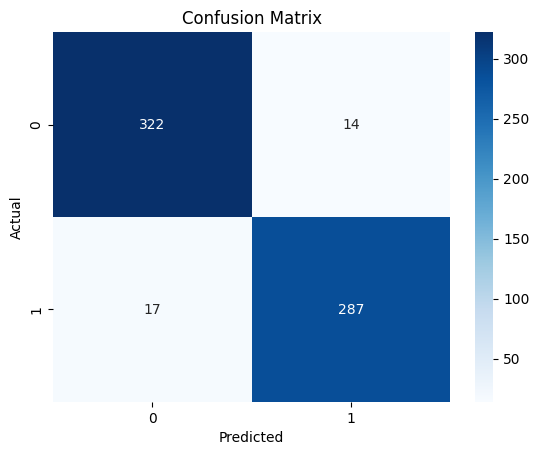

In [24]:
sns.heatmap(confMatrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Observations:

##### Actual Classes (Rows) and Predicted Classes (Columns):

* 0 (Normal): The actual class for normal X-ray images.
* 1 (Pneumonia): The actual class for X-ray images showing pneumonia.

<br> 

Confusion Matrix:

True Negatives (TN): 322 

False Positives (FP): 14

False Negatives (FN): 17

True Positives (TP): 287


<br>

1 . True Negatives (322):
* The model correctly predicted 322 normal X-ray images as normal.

2 . False Positives (14):
* The model incorrectly predicted 14 normal X-ray images as pneumonia.

3 . False Negatives (17):
* The model incorrectly predicted 17 pneumonia X-ray images as normal.

4 . True Positives (287):
* The model correctly predicted 287 pneumonia X-ray images as pneumonia.

<br>

Conclusion
The confusion matrix indicates that the CNN model performs well in classifying X-ray images into Normal and Pneumonia categories, with a high number of true positives and true negatives, and relatively low numbers of false positives and false negatives. This suggests that the model is effective for this classification task.

.

### Visualizing the loss values

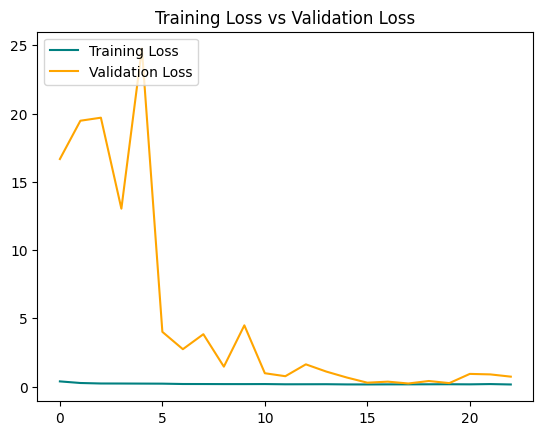

In [185]:
accuracy, val_accuracy = history.history['loss'], history.history['val_loss']

fig = plt.figure()
plt.plot(accuracy, color = 'teal', label='Training Loss')
plt.plot(val_accuracy, color = 'orange', label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend(loc='upper left')
plt.show()

Conclusion :

The training loss (teal line) remains consistently low, indicating the model learns well from the training data. The validation loss (orange line) starts high but decreases significantly and stabilizes, suggesting the model's performance improves on unseen data over time. The convergence of both losses indicates effective learning without overfitting.

.

### Visualizing the accuracy

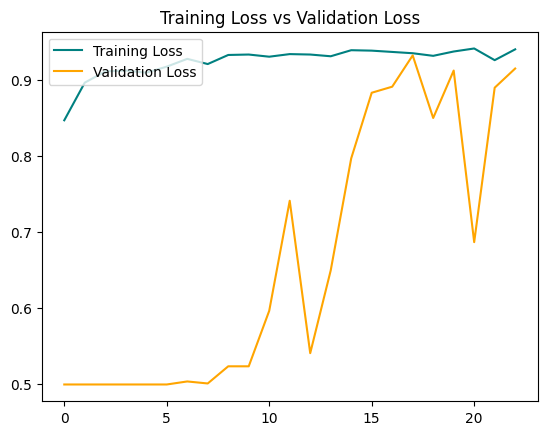

In [186]:
accuracy, val_accuracy = history.history['accuracy'], history.history['val_accuracy']

fig = plt.figure()
plt.plot(accuracy, color = 'teal', label='Training Loss')
plt.plot(val_accuracy, color = 'orange', label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend(loc='upper left')
plt.show()

Conclusion :

The graph indicates that despite initial fluctuations and high training loss, the model eventually learned to generalize well to unseen data. But the significant improvement in validation accuracy suggests effective learning over time. This implies that the model, although initially unstable, ultimately achieved strong performance in classifying X-ray images into Normal and Pneumonia categories.

.

###  Image Classification Function

In [193]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(100,100))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_array = input_image_array / 255.0
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = best_cnnModel.predict(input_image_exp_dim)
    result = tf.nn.sigmoid(predictions[0])
    outcome = 'The Image belongs to ' + trainClassNames[np.argmax(result)] + ' X-Ray Category with a score of '+ str(np.max(result)*100)
    return outcome

In [201]:
classify_images("Pneumonia Dataset/Sample/PNEUMONIA/person1950_bacteria_4881.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


'The Image belongs to PNEUMONIA X-Ray Category with a score of 43.24317276477814'

The Model is perfectly classifying the pneumonia images as pneumonia

.